
importing library


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data training preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/training',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 10806 files belonging to 2 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 2696 files belonging to 2 classes.


validation image preprocesssing


In [ ]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#for x,y in training_set:
    #print(x,x.shape)
    #print(y,y.shape)
#break

building model

In [1]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D

# Model Definition
model = Sequential()

# First Conv Block
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Second Conv Block
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Third Conv Block
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Fully Connected Layers
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())  # ✅ Replaces Flatten() for lower memory use
model.add(Dense(512, activation='relu'))  # ✅ Reduced from 1500 to 512
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))  # ✅ Softmax is fine for two-class classification

# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' if using one-hot labels
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                  

building convolution layer


training model


In [35]:
training_history_n=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
338/338 [==============================] - 703s 2s/step - loss: 0.6185 - accuracy: 0.6721 - val_loss: 0.5529 - val_accuracy: 0.7585
Epoch 2/10
338/338 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.8210

KeyboardInterrupt: 

model evaluation of training set

In [ ]:
# Evaluate  the training set
train_loss, train_acc = model.evaluate(training_set)

# Evaluate on the validation set (optional)
val_loss, val_acc = model.evaluate(validation_set)

# Print results
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


85/85 [==============================] - 27s 321ms/step - loss: 0.2773 - accuracy: 0.9010
Training Loss: 0.23914693295955658, Training Accuracy: 0.91763836145401
Validation Loss: 0.27728867530822754, Validation Accuracy: 0.9009643793106079


saving model

In [ ]:
model.save("trainnew_modell.keras")

In [ ]:
training_history_n.history

{'loss': [0.5869901776313782,
  0.4274155795574188,
  0.3552166223526001,
  0.30997034907341003,
  0.2908285856246948,
  0.27815237641334534,
  0.26597821712493896,
  0.263056218624115,
  0.25285688042640686,
  0.24955101311206818],
 'accuracy': [0.7076624035835266,
  0.821488082408905,
  0.8628539443016052,
  0.8831204771995544,
  0.8951508402824402,
  0.9026466608047485,
  0.9076439142227173,
  0.9084767699241638,
  0.9125486016273499,
  0.9139366745948792],
 'val_loss': [0.46188509464263916,
  0.3774718940258026,
  0.4389275312423706,
  0.36097410321235657,
  0.297209769487381,
  0.3044377565383911,
  0.2873913049697876,
  0.281782865524292,
  0.2814970016479492,
  0.2772887349128723],
 'val_accuracy': [0.7741097807884216,
  0.844584584236145,
  0.8137982487678528,
  0.859050452709198,
  0.8935459852218628,
  0.8935459852218628,
  0.8954005837440491,
  0.9031898975372314,
  0.8972551822662354,
  0.9009643793106079]}

In [ ]:
#recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history_n.history,f)


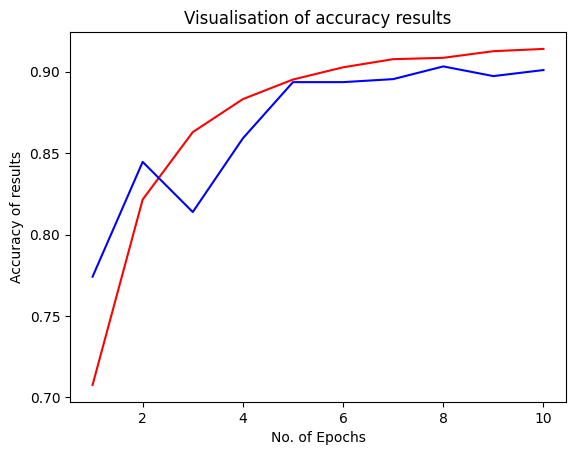

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history_n.history['accuracy'],color='red', label='Training accuracy')
plt.plot(epochs,training_history_n.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy of results")
plt.title("Visualisation of accuracy results")
plt.show()

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False
)


Found 2696 files belonging to 2 classes.


In [ ]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

85/85 [==============================] - 27s 318ms/step


(array([[8.4628421e-01, 1.5371577e-01],
        [8.7478864e-01, 1.2521140e-01],
        [7.7424252e-01, 2.2575746e-01],
        ...,
        [8.3498996e-01, 1.6501002e-01],
        [4.1667208e-05, 9.9995828e-01],
        [1.1844531e-07, 9.9999988e-01]], dtype=float32),
 (2696, 2))

In [ ]:
predicted_categories =tf.argmax(y_pred,axis=1)
y_pred,y_pred.shape

(array([[8.4628421e-01, 1.5371577e-01],
        [8.7478864e-01, 1.2521140e-01],
        [7.7424252e-01, 2.2575746e-01],
        ...,
        [8.3498996e-01, 1.6501002e-01],
        [4.1667208e-05, 9.9995828e-01],
        [1.1844531e-07, 9.9999988e-01]], dtype=float32),
 (2696, 2))

In [ ]:
predicted_categories

<tf.Tensor: shape=(2696,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 1, 1], dtype=int64)>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories

<tf.Tensor: shape=(2696,), dtype=int32, numpy=array([0, 0, 0, ..., 1, 1, 1])>

In [ ]:
Y_true = true_categories  # No need for tf.argmax()
print(Y_true)


tf.Tensor([0 0 0 ... 1 1 1], shape=(2696,), dtype=int32)


In [ ]:
print(true_categories.shape)  # Debugging step


(2696,)


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

# Define class names (replace with your actual class labels)
class_name = ['healthy', 'unhealthy']  # Example: Modify based on your dataset

# Generate the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


              precision    recall  f1-score   support

     healthy       0.84      0.98      0.91      1362
   unhealthy       0.98      0.82      0.89      1334

    accuracy                           0.90      2696
   macro avg       0.91      0.90      0.90      2696
weighted avg       0.91      0.90      0.90      2696



In [ ]:
cm= confusion_matrix(Y_true, predicted_categories)
cm

array([[1341,   21],
       [ 246, 1088]], dtype=int64)

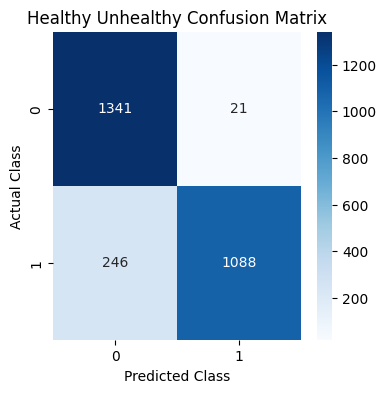

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example usage:
# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

# Plot heatmap
plt.figure(figsize=(4, 4))  # Create figure first
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Save the axes to a variable

# Labels and title
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.set_title("Healthy Unhealthy Confusion Matrix")

plt.show()


In [ ]:
model.save("trainnew_modell.keras")


In [ ]:
model.save("trainnew_modell.h5")

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0
